# Decision Tree Regression:
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.
Here you'll find the [scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

## Import the required libraries

In [21]:
# Import packages
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
#import import graphviz
import graphviz
from dtreeviz.trees import dtreeviz

from sklearn.model_selection import train_test_split,  cross_val_predict, cross_val_score, cross_validate 
#Metrics
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error

In [22]:
Alloys= pd.read_csv("../data/Alloy_Inter.csv")

In [23]:
X = Alloys.drop(["Epit"], axis=1) # in features we take all the files and the columns from 1 till 5
y = Alloys["Epit"]  # in target feature we take all files and the column 0
  
    # Spliting the dataset into train and test, taking the size of the test of 0.3 and training set 0-7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

You cant try to change some parameters of the decision tree stated here, like `max_depth`, `max_features` etc. to see how it affects the results below.

In [26]:
# Fit the regressor, set max_depth = 3
dec_tree = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = dec_tree.fit(X_train, y_train)
  
text_representation = tree.export_text(dec_tree)
print(text_representation)

|--- feature_17 <= 62.81
|   |--- feature_11 <= 2.21
|   |   |--- feature_9 <= 1.00
|   |   |   |--- value: [-168.49]
|   |   |--- feature_9 >  1.00
|   |   |   |--- value: [276.63]
|   |--- feature_11 >  2.21
|   |   |--- feature_0 <= 0.31
|   |   |   |--- value: [672.30]
|   |   |--- feature_0 >  0.31
|   |   |   |--- value: [419.43]
|--- feature_17 >  62.81
|   |--- feature_17 <= 95.50
|   |   |--- feature_21 <= 20.38
|   |   |   |--- value: [-110.73]
|   |   |--- feature_21 >  20.38
|   |   |   |--- value: [-493.75]
|   |--- feature_17 >  95.50
|   |   |--- feature_16 <= 15.11
|   |   |   |--- value: [-638.79]
|   |   |--- feature_16 >  15.11
|   |   |   |--- value: [-386.67]



In [27]:

y_pred_train = dec_tree.predict(X_train)
y_pred_test = dec_tree.predict(X_test)

In [28]:
# Function to calculate accuracy 
def metrics(y_pred_test, y_pred_train): 
    
    print("MAE in Decision Tree", mean_absolute_error(y_test, y_pred_test).round(3))
    print("RMSE in Decision Tree", mean_squared_error(y_test, y_pred_test, squared=False).round(3))
    print("R2 in Decision Tree", r2_score(y_test, y_pred_test).round(3))

In [29]:
# print the predicted
print(metrics(y_test, y_train)) 
print(metrics(y_pred_test, y_pred_train)) 

MAE in Decision Tree 0.0
RMSE in Decision Tree 0.0
R2 in Decision Tree 1.0
None
MAE in Decision Tree 233.178
RMSE in Decision Tree 311.452
R2 in Decision Tree 0.514
None


## Visualising the result

In [30]:
feature_alloys= ['Cl', 'Test_Temp', 'pH', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other',
       'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta',
       'Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']

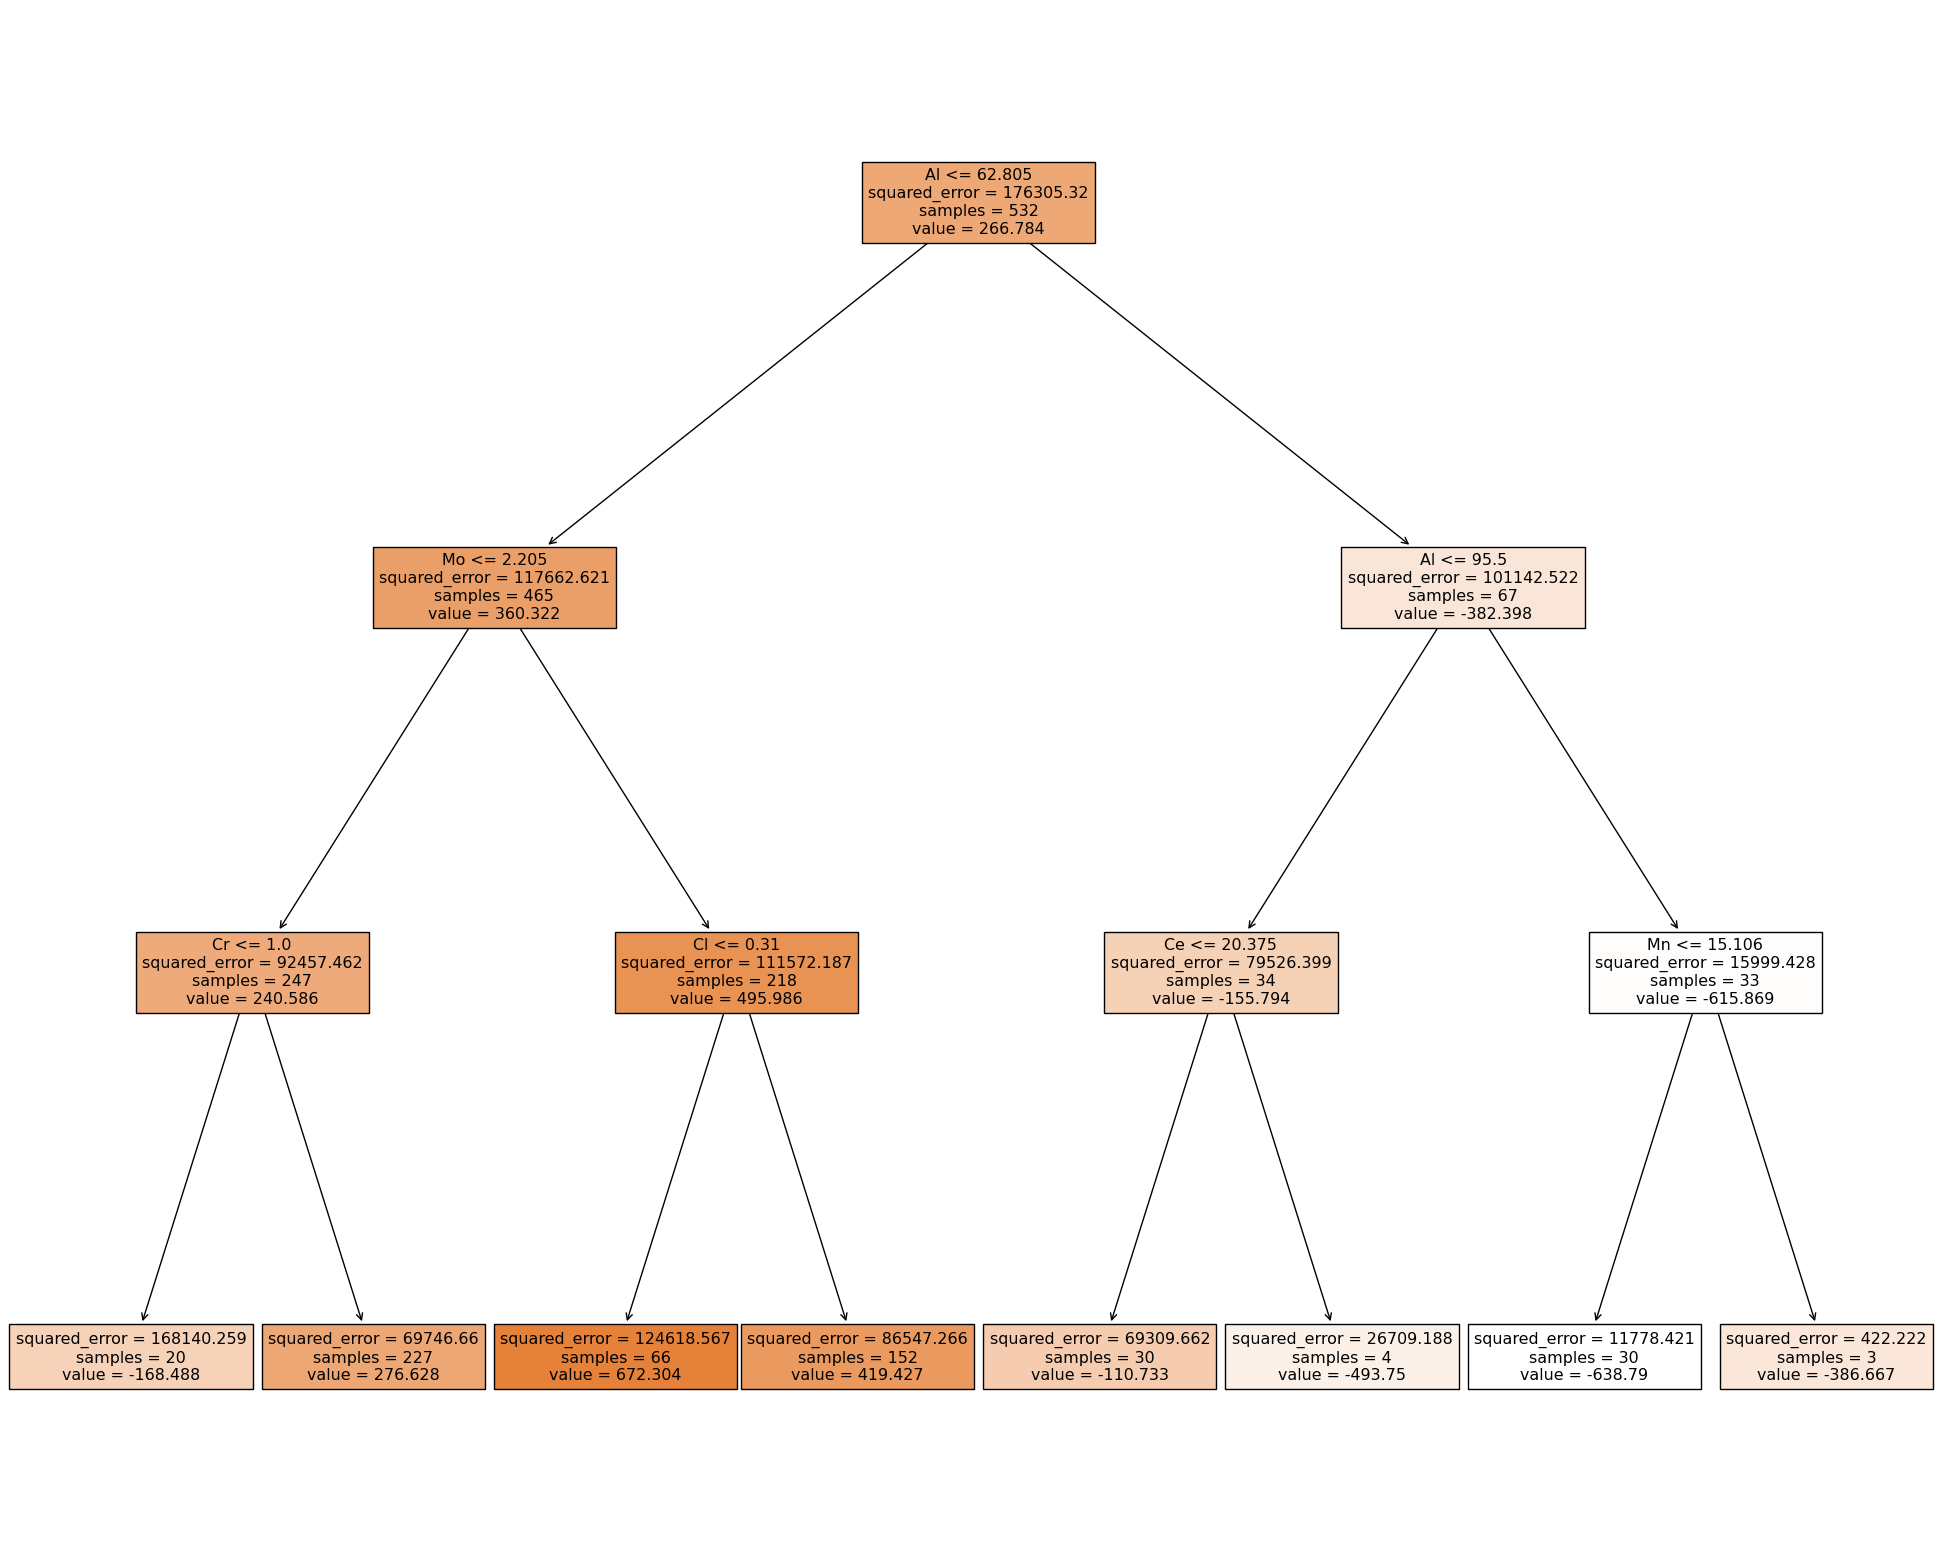

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=feature_alloys, filled=True)

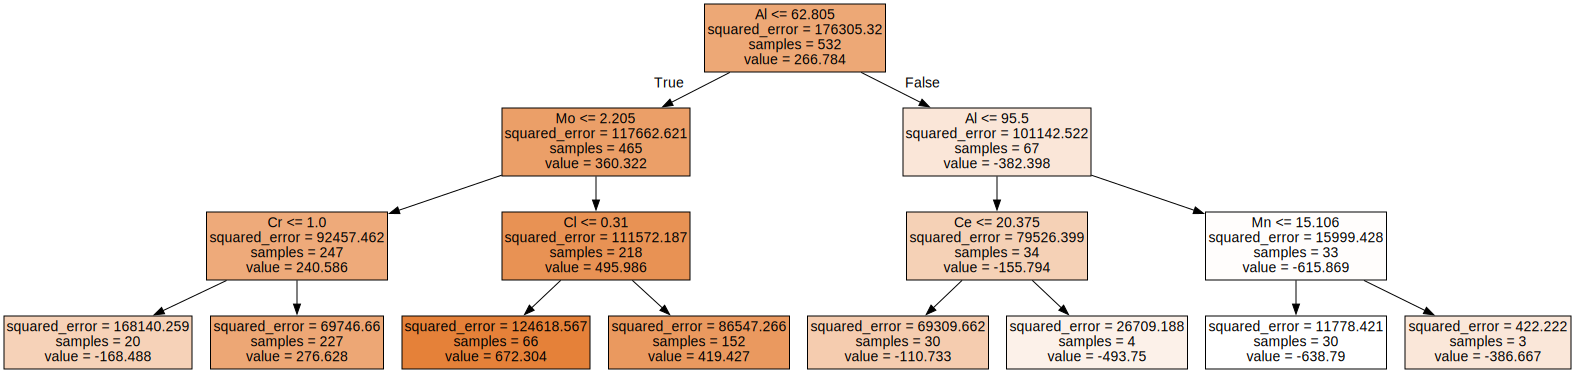

In [32]:
plt.xkcd()
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=feature_alloys,
                                filled=True)
graphviz.Source(dot_data, format="png") 
#Cl', 'Test_Temp', 'pH', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other','Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta', 'Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd'

## Package idea taken from [Visualisation](https://mljar.com/blog/visualize-decision-tree/)

/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


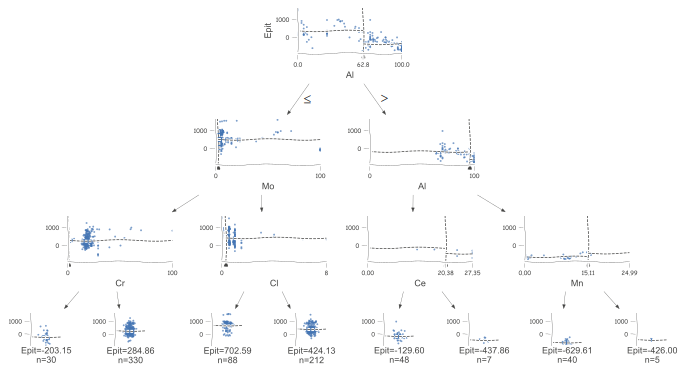

In [33]:
viz = dtreeviz(regr, X, y,
                target_name="Epit",
                feature_names=feature_alloys)
viz